# Investigating the data for House Price Predictions

## Importing the data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
file_name = "all_houses_for_sale.pickle"
current_directory = os.getcwd()
pickle_file = os.path.join(current_directory, file_name)

In [4]:
pickle_file

'C:\\Users\\psydp2\\OneDrive - The University of Nottingham\\Year 2\\Group Project\\GitHub\\uon-dsda-22-y2-group-project-team-1\\investigations\\all_houses_for_sale.pickle'

In [5]:
df = pd.read_pickle(pickle_file)

In [6]:
df

,property_id,description,price,beds,baths,branch,post code,property type
0,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat
1,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat
2,property_2100326650,"3 bedroom Mid Terrace House for sale, Basildon Road, London, SE2","£475,000",3,1,Abbey Wood,SE2,flat
3,property_2100325739,"3 bedroom Mid Terrace House for sale, Redbourne Drive, London, SE28","£450,000",3,3,Abbey Wood,SE28,flat
4,property_2100325532,"3 bedroom Mid Terrace House for sale, Bracondale Road, London, SE2","£425,000",3,1,Abbey Wood,SE2,flat
...,...,...,...,...,...,...,...,...
4097,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat
4098,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat
4099,property_2100251715,"2 bedroom Flat for sale, Ashfield Court, York, YO24","£220,000",2,1,York,YO24,flat
4100,property_2100321230,"2 bedroom Semi Detached House for sale, Woodside Avenue, York, North Yorkshire, YO31","£210,000",2,1,York,YO31,flat


In [7]:
df['city'] = df['description'].str.split(',').str[-2].str.strip()
df['street'] = df['description'].str.split(',').str[-3].str.strip()

In [8]:
df

,property_id,description,price,beds,baths,branch,post code,property type,city,street
0,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat,London,Greening Street
1,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat,London,Greening Street
2,property_2100326650,"3 bedroom Mid Terrace House for sale, Basildon Road, London, SE2","£475,000",3,1,Abbey Wood,SE2,flat,London,Basildon Road
3,property_2100325739,"3 bedroom Mid Terrace House for sale, Redbourne Drive, London, SE28","£450,000",3,3,Abbey Wood,SE28,flat,London,Redbourne Drive
4,property_2100325532,"3 bedroom Mid Terrace House for sale, Bracondale Road, London, SE2","£425,000",3,1,Abbey Wood,SE2,flat,London,Bracondale Road
...,...,...,...,...,...,...,...,...,...,...
4097,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat,York,Byland Avenue
4098,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat,York,Byland Avenue
4099,property_2100251715,"2 bedroom Flat for sale, Ashfield Court, York, YO24","£220,000",2,1,York,YO24,flat,York,Ashfield Court
4100,property_2100321230,"2 bedroom Semi Detached House for sale, Woodside Avenue, York, North Yorkshire, YO31","£210,000",2,1,York,YO31,flat,North Yorkshire,York


## Creating Lat Long Columns

In [9]:
#!pip install pgeocode

In [10]:
import pgeocode

In [11]:
geo = pgeocode.Nominatim("gb")
for i, row in df.iterrows():
    postcode = row['post code']
    location = geo.query_postal_code(postcode)
    latitude = location.latitude
    longitude = location.longitude

    df.at[i, 'latitude'] = latitude
    df.at[i, 'longitude'] = longitude

In [12]:
df

,property_id,description,price,beds,baths,branch,post code,property type,city,street,latitude,longitude
0,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat,London,Greening Street,51.48690,0.107500
1,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat,London,Greening Street,51.48690,0.107500
2,property_2100326650,"3 bedroom Mid Terrace House for sale, Basildon Road, London, SE2","£475,000",3,1,Abbey Wood,SE2,flat,London,Basildon Road,51.48690,0.107500
3,property_2100325739,"3 bedroom Mid Terrace House for sale, Redbourne Drive, London, SE28","£450,000",3,3,Abbey Wood,SE28,flat,London,Redbourne Drive,51.50230,0.104500
4,property_2100325532,"3 bedroom Mid Terrace House for sale, Bracondale Road, London, SE2","£425,000",3,1,Abbey Wood,SE2,flat,London,Bracondale Road,51.48690,0.107500
...,...,...,...,...,...,...,...,...,...,...,...,...
4097,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat,York,Byland Avenue,53.95760,-1.082700
4098,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat,York,Byland Avenue,53.95760,-1.082700
4099,property_2100251715,"2 bedroom Flat for sale, Ashfield Court, York, YO24","£220,000",2,1,York,YO24,flat,York,Ashfield Court,53.94600,-1.116900
4100,property_2100321230,"2 bedroom Semi Detached House for sale, Woodside Avenue, York, North Yorkshire, YO31","£210,000",2,1,York,YO31,flat,North Yorkshire,York,53.95760,-1.082700


## Distance fron London Feature

In [13]:
from math import radians, sin, cos, sqrt, atan2
def calculate_distance(lat1, lon1, lat2, lon2):
    lat1_rad, lon1_rad, lat2_rad, lon2_rad = map(radians, [lat1, lon1, lat2, lon2])
    radius = 3959
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = sin(dlat/2) ** 2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon/2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = radius * c
    return distance

london_lat = 51.5074
london_lon = -0.1278
df['Distance_from_London'] = df.apply(lambda row: calculate_distance(row['latitude'], row['longitude'], london_lat, london_lon), axis=1)


In [14]:
df

,property_id,description,price,beds,baths,branch,post code,property type,city,street,latitude,longitude,Distance_from_London
0,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat,London,Greening Street,51.48690,0.107500,10.220518
1,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat,London,Greening Street,51.48690,0.107500,10.220518
2,property_2100326650,"3 bedroom Mid Terrace House for sale, Basildon Road, London, SE2","£475,000",3,1,Abbey Wood,SE2,flat,London,Basildon Road,51.48690,0.107500,10.220518
3,property_2100325739,"3 bedroom Mid Terrace House for sale, Redbourne Drive, London, SE28","£450,000",3,3,Abbey Wood,SE28,flat,London,Redbourne Drive,51.50230,0.104500,9.997357
4,property_2100325532,"3 bedroom Mid Terrace House for sale, Bracondale Road, London, SE2","£425,000",3,1,Abbey Wood,SE2,flat,London,Bracondale Road,51.48690,0.107500,10.220518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat,York,Byland Avenue,53.95760,-1.082700,173.949064
4098,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat,York,Byland Avenue,53.95760,-1.082700,173.949064
4099,property_2100251715,"2 bedroom Flat for sale, Ashfield Court, York, YO24","£220,000",2,1,York,YO24,flat,York,Ashfield Court,53.94600,-1.116900,173.505814
4100,property_2100321230,"2 bedroom Semi Detached House for sale, Woodside Avenue, York, North Yorkshire, YO31","£210,000",2,1,York,YO31,flat,North Yorkshire,York,53.95760,-1.082700,173.949064


## Visualisation of the data

## Removing Empty Values

In [15]:
def remove_rows_with_empty_values(dataframe):
    dataframe = dataframe.dropna()
    dataframe = dataframe.reset_index(drop=True)
    return dataframe

In [16]:
df = remove_rows_with_empty_values(df)

In [17]:
df.isna().sum()

property_id             0
description             0
price                   0
beds                    0
baths                   0
branch                  0
post code               0
property type           0
city                    0
street                  0
latitude                0
longitude               0
Distance_from_London    0
dtype: int64

## Removing Non-Integer Rows from Price

In [18]:
df['price'] = df['price'].str.replace('£', '').str.replace(',', '')

In [19]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

In [20]:
df['price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4095 entries, 0 to 4095
Series name: price
Non-Null Count  Dtype  
--------------  -----  
4095 non-null   float64
dtypes: float64(1)
memory usage: 64.0 KB


In [21]:
df['price'] = df['price'].astype(int)

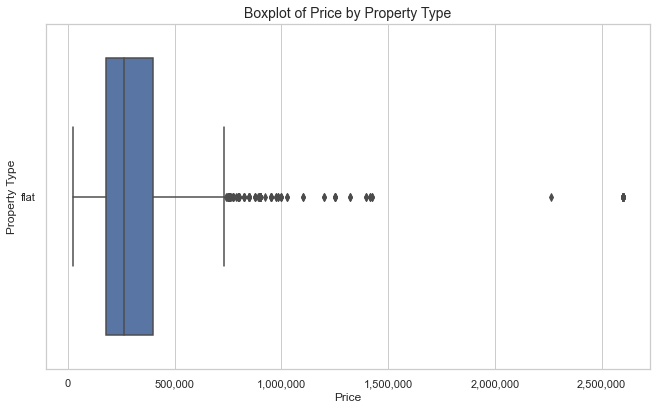

In [22]:
from matplotlib.ticker import FuncFormatter
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, y='property type', x='price', ax=ax, orient='h')
ax.set_xlabel('Price', fontsize=12)
ax.set_ylabel('Property Type', fontsize=12)
plt.title('Boxplot of Price by Property Type', fontsize=14)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show()

## Bedrooms

In [23]:
df['beds'] = df['beds'].astype(int)

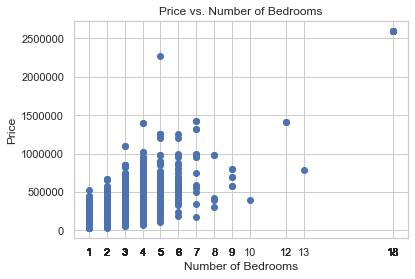

In [24]:
import matplotlib.pyplot as plt

sorted_df = df.sort_values('beds')
plt.scatter(sorted_df['beds'], sorted_df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price vs. Number of Bedrooms')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(sorted_df['beds'].astype(int))

plt.show()

## Categorising Columns

In [25]:
column_to_remove = ['property_id','description','post code','street']
df_without_column = df.drop(column_to_remove, axis=1)

In [26]:
df_without_column

,price,beds,baths,branch,property type,city,latitude,longitude,Distance_from_London
0,582000,3,1,Abbey Wood,flat,London,51.48690,0.107500,10.220518
1,582000,3,1,Abbey Wood,flat,London,51.48690,0.107500,10.220518
2,475000,3,1,Abbey Wood,flat,London,51.48690,0.107500,10.220518
3,450000,3,3,Abbey Wood,flat,London,51.50230,0.104500,9.997357
4,425000,3,1,Abbey Wood,flat,London,51.48690,0.107500,10.220518
...,...,...,...,...,...,...,...,...,...
4091,225000,3,1,York,flat,York,53.95760,-1.082700,173.949064
4092,225000,3,1,York,flat,York,53.95760,-1.082700,173.949064
4093,220000,2,1,York,flat,York,53.94600,-1.116900,173.505814
4094,210000,2,1,York,flat,North Yorkshire,53.95760,-1.082700,173.949064


In [27]:
branchid = {}
for idx, name in enumerate(df_without_column['branch'].unique()):
    branchid[name] = idx
df_without_column['BranchNumber'] = df_without_column['branch'].map(branchid)

In [28]:
property_type = {}
for idx, name in enumerate(df_without_column['property type'].unique()):
    property_type[name] = idx
df_without_column['PropertyTypeNumber'] = df_without_column['property type'].map(property_type)

In [29]:
city = {}
for idx, name in enumerate(df_without_column['city'].unique()):
    city[name] = idx
df_without_column['CityNumber'] = df_without_column['city'].map(city)

In [30]:
columns_to_remove = ['branch','property type','city']
df_without_column = df_without_column.drop(columns_to_remove, axis = 1)

In [31]:
df_without_column

,price,beds,baths,latitude,longitude,Distance_from_London,BranchNumber,PropertyTypeNumber,CityNumber
0,582000,3,1,51.48690,0.107500,10.220518,0,0,0
1,582000,3,1,51.48690,0.107500,10.220518,0,0,0
2,475000,3,1,51.48690,0.107500,10.220518,0,0,0
3,450000,3,3,51.50230,0.104500,9.997357,0,0,0
4,425000,3,1,51.48690,0.107500,10.220518,0,0,0
...,...,...,...,...,...,...,...,...,...
4091,225000,3,1,53.95760,-1.082700,173.949064,150,0,202
4092,225000,3,1,53.95760,-1.082700,173.949064,150,0,202
4093,220000,2,1,53.94600,-1.116900,173.505814,150,0,202
4094,210000,2,1,53.95760,-1.082700,173.949064,150,0,79


## Correlations

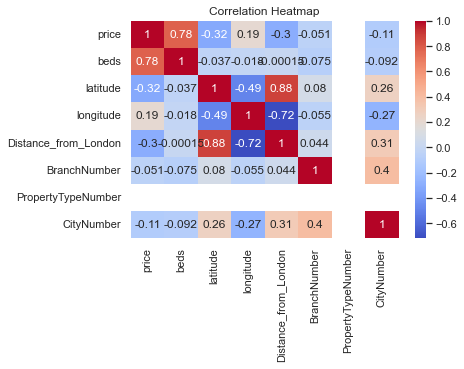

In [32]:
corr_matrix = df_without_column.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Model Build

In [33]:
df_without_column

,price,beds,baths,latitude,longitude,Distance_from_London,BranchNumber,PropertyTypeNumber,CityNumber
0,582000,3,1,51.48690,0.107500,10.220518,0,0,0
1,582000,3,1,51.48690,0.107500,10.220518,0,0,0
2,475000,3,1,51.48690,0.107500,10.220518,0,0,0
3,450000,3,3,51.50230,0.104500,9.997357,0,0,0
4,425000,3,1,51.48690,0.107500,10.220518,0,0,0
...,...,...,...,...,...,...,...,...,...
4091,225000,3,1,53.95760,-1.082700,173.949064,150,0,202
4092,225000,3,1,53.95760,-1.082700,173.949064,150,0,202
4093,220000,2,1,53.94600,-1.116900,173.505814,150,0,202
4094,210000,2,1,53.95760,-1.082700,173.949064,150,0,79


In [34]:
X = df_without_column.drop('price', axis=1)  # Features
y = df_without_column['price']  # Target variable

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [37]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
df_predictions = X_test.copy()
df_predictions['logistic_predictions'] = logistic_predictions

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn.metrics import mean_squared_error
logistic_mse = mean_squared_error(y_test, logistic_predictions)
print("MSE for Logistic Regression:", sqrt(logistic_mse))

MSE for Logistic Regression: 8282.81787379168


## Random Forest Classifier

In [39]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
df_predictions = X_test.copy()
df_predictions['rf_predictions'] = rf_predictions

In [40]:
rf_mse = mean_squared_error(y_test, rf_predictions)
print("MSE for Random Forest:", sqrt(rf_mse))

MSE for Random Forest: 12807.50474182398


## Gradient Boosting

In [41]:
#gb_model = GradientBoostingClassifier()
#gb_model.fit(X_train, y_train)
#gb_predictions = gb_model.predict(X_test)
df_predictions = X_test.copy()
#df_predictions['gb_predictions'] = gb_predictions

## Best Model

In [42]:
df_predictions = X_test.copy()
df_predictions['logistic_predictions'] = logistic_predictions

In [43]:
df_predictions['Listing_Price'] = y_test

In [44]:
df_predictions

,beds,baths,latitude,longitude,Distance_from_London,BranchNumber,PropertyTypeNumber,CityNumber,logistic_predictions,Listing_Price
1298,3,1,52.500000,-2.083300,107.804440,41,0,13,250000,210000
2712,4,2,52.275820,-0.833080,61.021664,97,0,1,755000,500000
3544,2,1,53.007180,-2.253533,137.185265,128,0,43,250000,80000
3358,2,1,51.422000,-0.554525,19.293969,122,0,96,900000,445000
2866,5,2,50.374350,-4.164200,192.359858,104,0,99,225000,260000
...,...,...,...,...,...,...,...,...,...,...
862,5,1,54.860067,-1.561167,239.129560,28,0,60,130000,249950
3761,2,1,52.676600,-2.449300,127.425033,138,0,157,225000,165000
2629,4,3,52.242575,-0.937950,61.439740,97,0,1,755000,490000
1425,2,1,54.774820,-1.567140,233.506469,46,0,60,140000,130000


## Renaming data

In [45]:
column_names = {
    'beds': 'Beds',
    'baths': 'Baths',
    'latitude': 'Latitude',
    'longitude':'Longitude',
    'Distance_from_London':'Distance_From_London',
    'logistic_predictions':'Predicted_Price',
    
}
df_predictions.rename(columns=column_names, inplace=True)


In [46]:
df_predictions

,Beds,Baths,Latitude,Longitude,Distance_From_London,BranchNumber,PropertyTypeNumber,CityNumber,Predicted_Price,Listing_Price
1298,3,1,52.500000,-2.083300,107.804440,41,0,13,250000,210000
2712,4,2,52.275820,-0.833080,61.021664,97,0,1,755000,500000
3544,2,1,53.007180,-2.253533,137.185265,128,0,43,250000,80000
3358,2,1,51.422000,-0.554525,19.293969,122,0,96,900000,445000
2866,5,2,50.374350,-4.164200,192.359858,104,0,99,225000,260000
...,...,...,...,...,...,...,...,...,...,...
862,5,1,54.860067,-1.561167,239.129560,28,0,60,130000,249950
3761,2,1,52.676600,-2.449300,127.425033,138,0,157,225000,165000
2629,4,3,52.242575,-0.937950,61.439740,97,0,1,755000,490000
1425,2,1,54.774820,-1.567140,233.506469,46,0,60,140000,130000


In [47]:
df_predictions['Evaluation'] = df_predictions['Predicted_Price'] - df_predictions['Listing_Price']

In [48]:
df_predictions['Comparison'] = ['Undervalued' if diff > 0 else 'Overvalued' for diff in df_predictions['Evaluation']]

In [49]:
df_predictions

,Beds,Baths,Latitude,Longitude,Distance_From_London,BranchNumber,PropertyTypeNumber,CityNumber,Predicted_Price,Listing_Price,Evaluation,Comparison
1298,3,1,52.500000,-2.083300,107.804440,41,0,13,250000,210000,40000,Undervalued
2712,4,2,52.275820,-0.833080,61.021664,97,0,1,755000,500000,255000,Undervalued
3544,2,1,53.007180,-2.253533,137.185265,128,0,43,250000,80000,170000,Undervalued
3358,2,1,51.422000,-0.554525,19.293969,122,0,96,900000,445000,455000,Undervalued
2866,5,2,50.374350,-4.164200,192.359858,104,0,99,225000,260000,-35000,Overvalued
...,...,...,...,...,...,...,...,...,...,...,...,...
862,5,1,54.860067,-1.561167,239.129560,28,0,60,130000,249950,-119950,Overvalued
3761,2,1,52.676600,-2.449300,127.425033,138,0,157,225000,165000,60000,Undervalued
2629,4,3,52.242575,-0.937950,61.439740,97,0,1,755000,490000,265000,Undervalued
1425,2,1,54.774820,-1.567140,233.506469,46,0,60,140000,130000,10000,Undervalued


In [50]:
df_predictions = df_predictions.drop('Evaluation', axis=1)

In [51]:
id_to_branch = {v: k for k, v in branchid.items()}
df_predictions['BranchName'] = df_predictions['BranchNumber'].replace(id_to_branch)

In [52]:
id_to_property_type = {v: k for k, v in property_type.items()}
df_predictions['PropertyType'] = df_predictions['PropertyTypeNumber'].replace(id_to_property_type)

In [53]:
id_to_city = {v: k for k, v in city.items()}
df_predictions['City'] = df_predictions['CityNumber'].replace(id_to_city)

In [54]:
df_predictions

,Beds,Baths,Latitude,Longitude,Distance_From_London,BranchNumber,PropertyTypeNumber,CityNumber,Predicted_Price,Listing_Price,Comparison,BranchName,PropertyType,City
1298,3,1,52.500000,-2.083300,107.804440,41,0,13,250000,210000,Undervalued,Dudley,flat,West Midlands
2712,4,2,52.275820,-0.833080,61.021664,97,0,1,755000,500000,Undervalued,Northampton Student Living,flat,Northampton
3544,2,1,53.007180,-2.253533,137.185265,128,0,43,250000,80000,Undervalued,Tunstall,flat,Staffordshire
3358,2,1,51.422000,-0.554525,19.293969,122,0,96,900000,445000,Undervalued,Sutton Lettings,flat,Surrey
2866,5,2,50.374350,-4.164200,192.359858,104,0,99,225000,260000,Overvalued,Plymouth,flat,Devon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,5,1,54.860067,-1.561167,239.129560,28,0,60,130000,249950,Overvalued,Chester-le-Street,flat,Durham
3761,2,1,52.676600,-2.449300,127.425033,138,0,157,225000,165000,Undervalued,Wellington,flat,Shropshire
2629,4,3,52.242575,-0.937950,61.439740,97,0,1,755000,490000,Undervalued,Northampton Student Living,flat,Northampton
1425,2,1,54.774820,-1.567140,233.506469,46,0,60,140000,130000,Undervalued,Durham,flat,Durham


In [55]:
df_predictions = df_predictions.drop(['BranchNumber','PropertyTypeNumber','CityNumber'], axis=1)

In [56]:
df_predictions

,Beds,Baths,Latitude,Longitude,Distance_From_London,Predicted_Price,Listing_Price,Comparison,BranchName,PropertyType,City
1298,3,1,52.500000,-2.083300,107.804440,250000,210000,Undervalued,Dudley,flat,West Midlands
2712,4,2,52.275820,-0.833080,61.021664,755000,500000,Undervalued,Northampton Student Living,flat,Northampton
3544,2,1,53.007180,-2.253533,137.185265,250000,80000,Undervalued,Tunstall,flat,Staffordshire
3358,2,1,51.422000,-0.554525,19.293969,900000,445000,Undervalued,Sutton Lettings,flat,Surrey
2866,5,2,50.374350,-4.164200,192.359858,225000,260000,Overvalued,Plymouth,flat,Devon
...,...,...,...,...,...,...,...,...,...,...,...
862,5,1,54.860067,-1.561167,239.129560,130000,249950,Overvalued,Chester-le-Street,flat,Durham
3761,2,1,52.676600,-2.449300,127.425033,225000,165000,Undervalued,Wellington,flat,Shropshire
2629,4,3,52.242575,-0.937950,61.439740,755000,490000,Undervalued,Northampton Student Living,flat,Northampton
1425,2,1,54.774820,-1.567140,233.506469,140000,130000,Undervalued,Durham,flat,Durham


In [59]:
column_order = ['BranchName', 'City', 'PropertyType','Beds', 'Baths', 'Latitude', 'Longitude', 'Distance_From_London', 'Listing_Price','Predicted_Price','Comparison']
final_df = df_predictions.reindex(columns=column_order)

In [60]:
final_df

,BranchName,City,PropertyType,Beds,Baths,Latitude,Longitude,Distance_From_London,Listing_Price,Predicted_Price,Comparison
1298,Dudley,West Midlands,flat,3,1,52.500000,-2.083300,107.804440,210000,250000,Undervalued
2712,Northampton Student Living,Northampton,flat,4,2,52.275820,-0.833080,61.021664,500000,755000,Undervalued
3544,Tunstall,Staffordshire,flat,2,1,53.007180,-2.253533,137.185265,80000,250000,Undervalued
3358,Sutton Lettings,Surrey,flat,2,1,51.422000,-0.554525,19.293969,445000,900000,Undervalued
2866,Plymouth,Devon,flat,5,2,50.374350,-4.164200,192.359858,260000,225000,Overvalued
...,...,...,...,...,...,...,...,...,...,...,...
862,Chester-le-Street,Durham,flat,5,1,54.860067,-1.561167,239.129560,249950,130000,Overvalued
3761,Wellington,Shropshire,flat,2,1,52.676600,-2.449300,127.425033,165000,225000,Undervalued
2629,Northampton Student Living,Northampton,flat,4,3,52.242575,-0.937950,61.439740,490000,755000,Undervalued
1425,Durham,Durham,flat,2,1,54.774820,-1.567140,233.506469,130000,140000,Undervalued


In [63]:
final_df.to_csv("PredictedHousesSample.csv",index=False)